In [24]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob
import os
import shutil
import gzip

## Data Extraction

In [26]:
gz_files = [f for f in glob(f"./data/**/*.gz", recursive=True) if os.path.isfile(f)]

In [27]:
gz_files

['./data/sub-0270/ses-01/func/sub-0270_ses-01_task-rest_bold.nii.gz',
 './data/sub-0270/ses-01/anat/sub-0270_ses-01_T1w.nii.gz',
 './data/sub-0205/ses-01/func/sub-0205_ses-01_task-rest_bold.nii.gz',
 './data/sub-0205/ses-01/anat/sub-0205_ses-01_T1w.nii.gz',
 './data/sub-0231/ses-01/func/sub-0231_ses-01_task-rest_bold.nii.gz',
 './data/sub-0231/ses-01/anat/sub-0231_ses-01_T1w.nii.gz',
 './data/sub-0240/ses-01/func/sub-0240_ses-01_task-rest_bold.nii.gz',
 './data/sub-0240/ses-01/anat/sub-0240_ses-01_T1w.nii.gz',
 './data/sub-0238/ses-01/func/sub-0238_ses-01_task-rest_bold.nii.gz',
 './data/sub-0238/ses-01/anat/sub-0238_ses-01_T1w.nii.gz',
 './data/sub-0252/ses-01/func/sub-0252_ses-01_task-rest_bold.nii.gz',
 './data/sub-0252/ses-01/anat/sub-0252_ses-01_T1w.nii.gz',
 './data/sub-2132/ses-01/func/sub-2132_ses-01_task-rest_bold.nii.gz',
 './data/sub-2132/ses-01/anat/sub-2132_ses-01_T1w.nii.gz',
 './data/sub-2122/ses-01/func/sub-2122_ses-01_task-rest_bold.nii.gz',
 './data/sub-2122/ses-01/an

In [29]:
# Extract each .gz file
for gz_file in gz_files:
    output_file = gz_file[:-3]  # Remove ".gz" extension

    # Decompress the .gz file
    with gzip.open(gz_file, 'rb') as f_in:
        with open(output_file, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    print(f"Extracted: {gz_file} -> {output_file}")


Extracted: ./data/sub-0270/ses-01/func/sub-0270_ses-01_task-rest_bold.nii.gz -> ./data/sub-0270/ses-01/func/sub-0270_ses-01_task-rest_bold.nii
Extracted: ./data/sub-0270/ses-01/anat/sub-0270_ses-01_T1w.nii.gz -> ./data/sub-0270/ses-01/anat/sub-0270_ses-01_T1w.nii
Extracted: ./data/sub-0205/ses-01/func/sub-0205_ses-01_task-rest_bold.nii.gz -> ./data/sub-0205/ses-01/func/sub-0205_ses-01_task-rest_bold.nii
Extracted: ./data/sub-0205/ses-01/anat/sub-0205_ses-01_T1w.nii.gz -> ./data/sub-0205/ses-01/anat/sub-0205_ses-01_T1w.nii
Extracted: ./data/sub-0231/ses-01/func/sub-0231_ses-01_task-rest_bold.nii.gz -> ./data/sub-0231/ses-01/func/sub-0231_ses-01_task-rest_bold.nii
Extracted: ./data/sub-0231/ses-01/anat/sub-0231_ses-01_T1w.nii.gz -> ./data/sub-0231/ses-01/anat/sub-0231_ses-01_T1w.nii
Extracted: ./data/sub-0240/ses-01/func/sub-0240_ses-01_task-rest_bold.nii.gz -> ./data/sub-0240/ses-01/func/sub-0240_ses-01_task-rest_bold.nii
Extracted: ./data/sub-0240/ses-01/anat/sub-0240_ses-01_T1w.nii.gz

## Data Declaration

In [32]:
nii_files = [f for f in glob(f"./data/**/*.nii", recursive=True) if os.path.isfile(f)]

In [33]:
nii_files   

['./data/sub-0270/ses-01/func/sub-0270_ses-01_task-rest_bold.nii',
 './data/sub-0270/ses-01/anat/sub-0270_ses-01_T1w.nii',
 './data/sub-0205/ses-01/func/sub-0205_ses-01_task-rest_bold.nii',
 './data/sub-0205/ses-01/anat/sub-0205_ses-01_T1w.nii',
 './data/sub-0231/ses-01/func/sub-0231_ses-01_task-rest_bold.nii',
 './data/sub-0231/ses-01/anat/sub-0231_ses-01_T1w.nii',
 './data/sub-0240/ses-01/func/sub-0240_ses-01_task-rest_bold.nii',
 './data/sub-0240/ses-01/anat/sub-0240_ses-01_T1w.nii',
 './data/sub-0238/ses-01/func/sub-0238_ses-01_task-rest_bold.nii',
 './data/sub-0238/ses-01/anat/sub-0238_ses-01_T1w.nii',
 './data/sub-0252/ses-01/func/sub-0252_ses-01_task-rest_bold.nii',
 './data/sub-0252/ses-01/anat/sub-0252_ses-01_T1w.nii',
 './data/sub-2132/ses-01/func/sub-2132_ses-01_task-rest_bold.nii',
 './data/sub-2132/ses-01/anat/sub-2132_ses-01_T1w.nii',
 './data/sub-2122/ses-01/func/sub-2122_ses-01_task-rest_bold.nii',
 './data/sub-2122/ses-01/anat/sub-2122_ses-01_T1w.nii',
 './data/sub-027

## Data Visualization

In [37]:
nii_files[1]

'./data/sub-0270/ses-01/anat/sub-0270_ses-01_T1w.nii'

In [40]:
nii_files[0]

'./data/sub-0270/ses-01/func/sub-0270_ses-01_task-rest_bold.nii'

In [69]:
nii_files[9]

'./data/sub-0238/ses-01/anat/sub-0238_ses-01_T1w.nii'

In [72]:
nii_files[0]

'./data/sub-0270/ses-01/func/sub-0270_ses-01_task-rest_bold.nii'

In [156]:
index = 1
nii_file_length = len(nii_files)

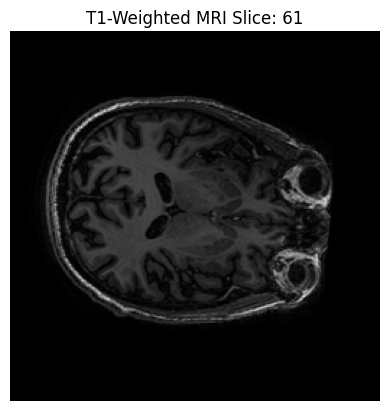

63

In [303]:
# Load the compressed NIfTI file
img = nib.load(nii_files[index])

# Get image data as a NumPy array
data = img.get_fdata()

# Display a middle slice of the brain
slice_index = data.shape[2] // 2  # Middle slice in the z-dimension
plt.imshow(data[:, :, slice_index], cmap="gray")
plt.axis("off")
plt.title(f"T1-Weighted MRI Slice: {index}")
plt.show()
index += 2
index %= nii_file_length
index

In [73]:
import nibabel as nib

# Load the fMRI NIfTI file
nii_file = "./data/sub-0270/ses-01/func/sub-0270_ses-01_task-rest_bold.nii"
img = nib.load(nii_file)  # Load the file
data = img.get_fdata()    # Convert to NumPy array

# Print file shape
print("Data shape:", data.shape)


Data shape: (64, 64, 34, 300)


In [74]:
print("Shape of the data:", data.shape)


Shape of the data: (64, 64, 34, 300)


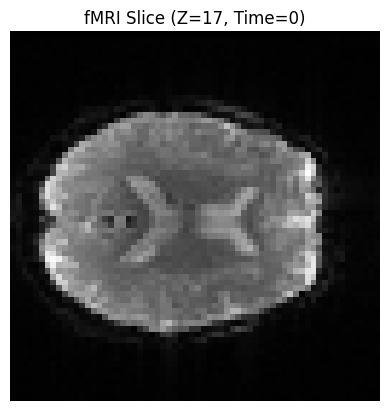

In [96]:
import matplotlib.pyplot as plt

# Choose a slice in the Z dimension (middle slice)
z_slice = data.shape[2] // 2  

# Choose a time point (e.g., first time frame)
time_point = 0  

# Extract the 2D slice at the chosen time point
slice_data = data[:, :, z_slice, time_point]

# Plot the slice
plt.imshow(slice_data, cmap="gray")
plt.axis("off")
plt.title(f"fMRI Slice (Z={z_slice}, Time={time_point})")
plt.show()
